In [1]:
samples <- read.table('both_samples.tsv')
# Переименовываем столбец 'virus' на 'condition'
colnames(samples)[colnames(samples) == "virus"] <- "condition"
# Проверяем, что столбец был переименован
print(colnames(samples))
# Если нужно сохранить измененный файл
write.table(samples, 'both_samples_condition.tsv')


[1] "condition"      "replicate"      "organoid_stage" "id"            
[5] "name"           "tissue"        


In [2]:
#load library and create subsets
library(dplyr)

samples <- read.table('both_samples_condition.tsv')

bsamples <- samples %>% filter(tissue == "brain")
gsamples <- samples %>% filter(tissue == "gut")
gundiffsamples <- samples %>% filter(tissue == "gut", organoid_stage == "undiff")
gdiffsamples <- samples %>% filter(tissue == "gut", organoid_stage == "diff")



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [3]:
bsamples

,condition,replicate,organoid_stage,id,name,tissue
,<chr>,<int>,<chr>,<chr>,<chr>,<chr>
VL1,MLB2,1,4d,VL1,MLB2_brain_4d_VL1,brain
VL2,MLB2,2,4d,VL2,MLB2_brain_4d_VL2,brain
VL3,VA1,1,4d,VL3,VA1_brain_4d_VL3,brain
VL4,VA1,2,4d,VL4,VA1_brain_4d_VL4,brain
VL5,HAstV4,1,4d,VL5,HAstV4_brain_4d_VL5,brain
VL6,HAstV4,2,4d,VL6,HAstV4_brain_4d_VL6,brain
VL7,Mock,1,4d,VL7,Mock_brain_4d_VL7,brain
VL8,Mock,2,4d,VL8,Mock_brain_4d_VL8,brain


In [4]:
#table both_counts.tsv contains all counts (viral, protein_coding and others)
counts <- read.table('both_counts.tsv')
dim(counts)

[1] 62757    32

In [5]:
bcounts <- counts[, grep("^VL", colnames(counts)), drop = FALSE]
# Проверяем, что в bcounts только колонки с префиксом "VL"
print(colnames(bcounts))

[1] "VL1" "VL2" "VL3" "VL4" "VL5" "VL6" "VL7" "VL8"


In [6]:
# Выбираем колонки, не начинающиеся с "VL" для gut
gcounts <- counts[, !grepl("^VL", colnames(counts)), drop = FALSE]
print(colnames(gcounts))

 [1] "S22" "S10" "S23" "S11" "S24" "S12" "S16" "S4"  "S17" "S5"  "S18" "S6" 
[13] "S13" "S1"  "S14" "S2"  "S15" "S3"  "S19" "S7"  "S20" "S8"  "S21" "S9" 


In [7]:
library(DESeq2)
colours = c(
    HAstV4='#ff9301',
    MLB2='#592bf5',
    VA1='#1fbd6b',
    mock='#919190')

Loading required package: S4Vectors

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:dplyr’:

    combine, intersect, setdiff, union


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, saveRDS, setdiff,
    table, tapply, union, unique, unsplit, which.max, which.min



Attaching package: ‘S4Vectors’


The following objects are masked from ‘package:dplyr’:

    first, rename


The following object is masked from ‘package:utils’:

    findMatches


The following objects are m

In [8]:
rownames(bsamples) = colnames(bcounts) = bsamples$name
deseq = DESeqDataSetFromMatrix(countData = bcounts,
                              colData = bsamples,
                               design = ~ condition)
deseq

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”


class: DESeqDataSet 
dim: 62757 8 
metadata(1): version
assays(1): counts
rownames(62757): ENSG00000279928 ENSG00000228037 ... MLB2 VA1
rowData names(0):
colnames(8): MLB2_brain_4d_VL1 MLB2_brain_4d_VL2 ... Mock_brain_4d_VL7
  Mock_brain_4d_VL8
colData names(6): condition replicate ... name tissue


FALSE  TRUE 
39029 23728 

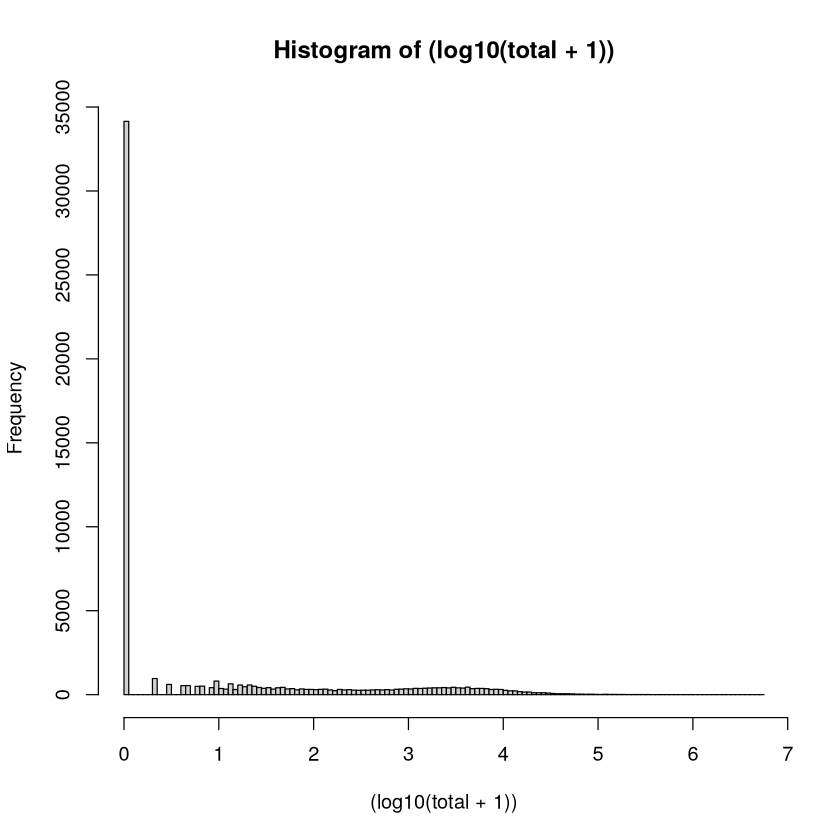

In [10]:
# filtes genes by total read counts
options(repr.plot.width = 7, repr.plot.height = 7, repr.plot.res = 120)
total = rowSums(counts(deseq))
hist((log10(total + 1)),100)
table(total>=10)